In [5]:
import numpy as np
import cv2
from New_PCA import NPCA
from Classify import Classify
import matplotlib.pyplot as plt
from FaceDetection import FaceDetection 

In [6]:
X = np.load('./X.npy')
y = np.load('./y.npy')

In [7]:
X.shape

(364, 64, 64)

[42]


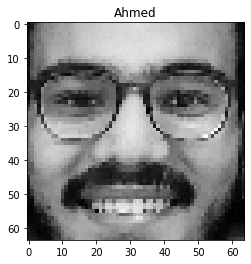

[42]


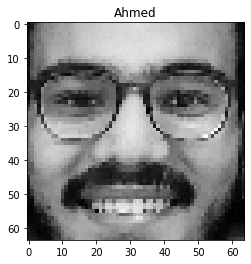

[322]


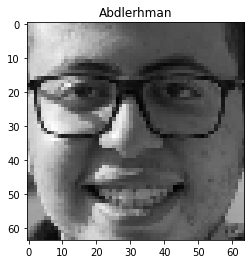

[359]


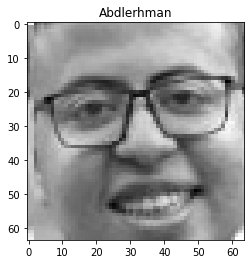

[250]


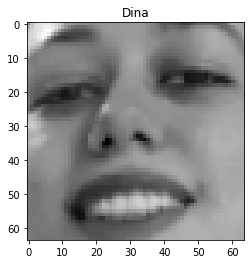

[355]


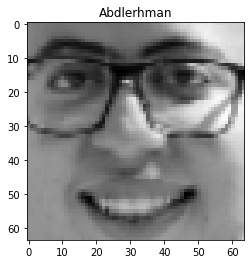

[29]


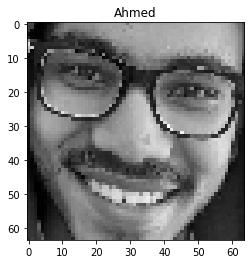

[229]


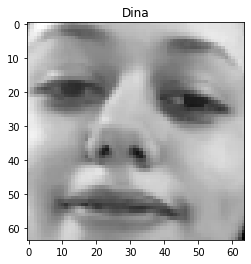

[201]


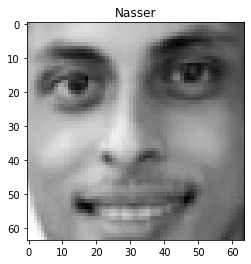

[296]


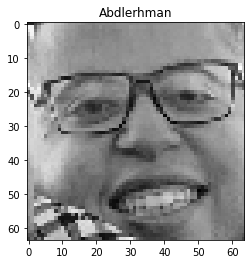

[176]


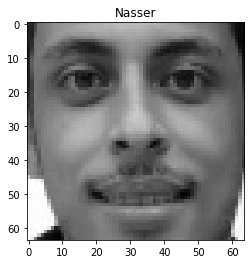

[161]


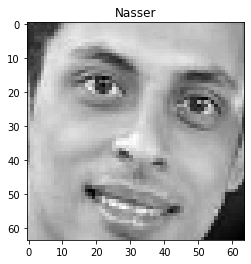

[101]


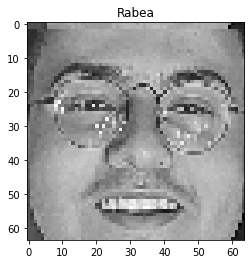

[246]


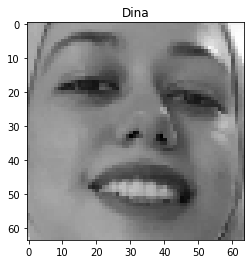

[347]


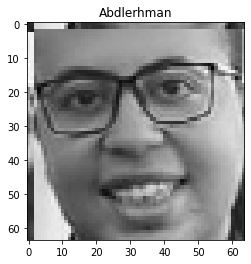

[327]


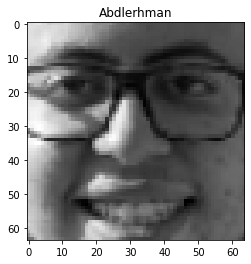

[202]


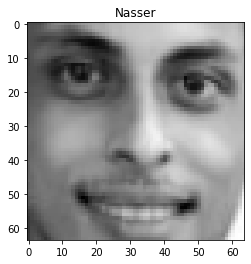

[268]


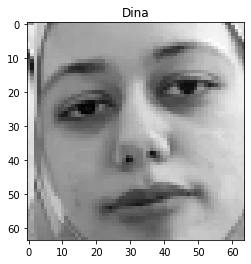

[170]


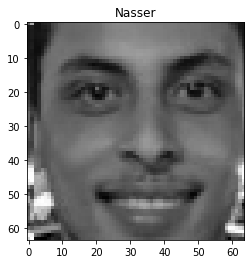

[15]


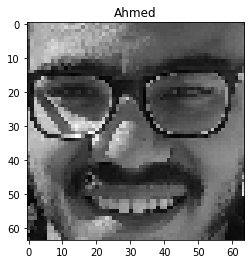

[225]


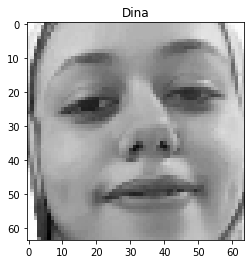

[108]


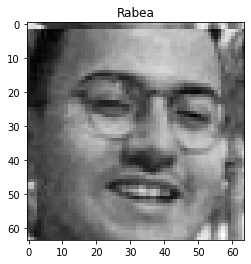

[169]


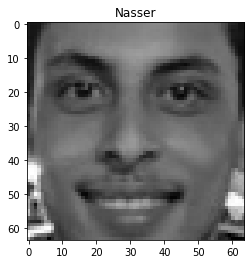

[134]


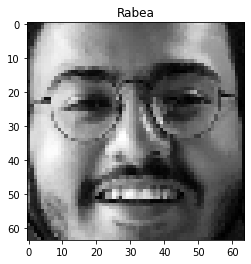

[63]


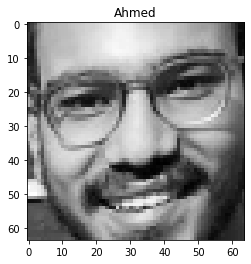

[195]


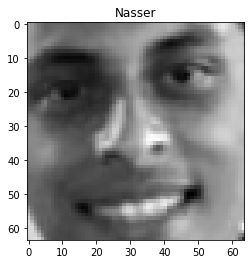

[326]


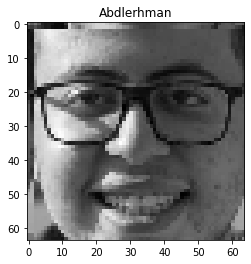

[264]


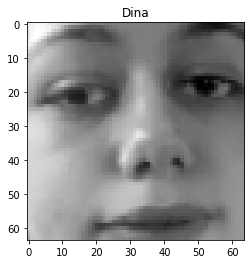

[153]


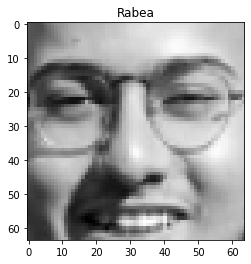

[81]


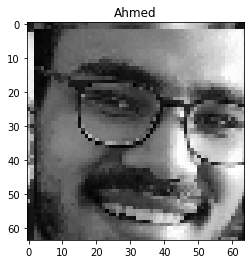

[233]


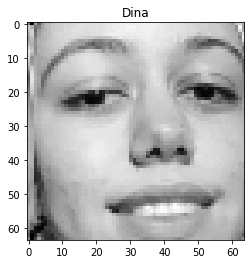

[119]


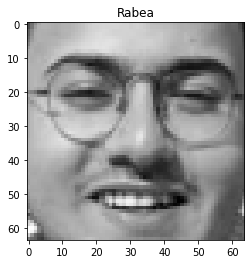

[324]


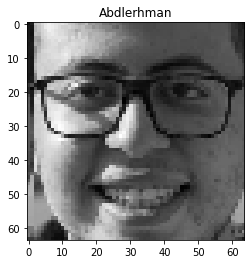

[30]


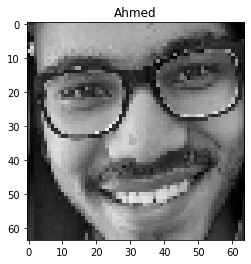

[296]


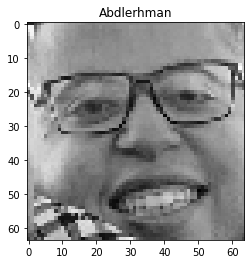

[251]


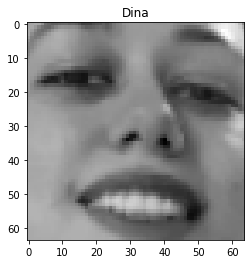

[2]


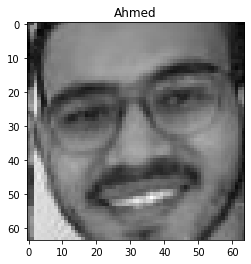

[4]


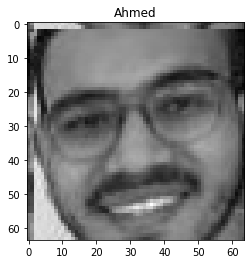

[347]


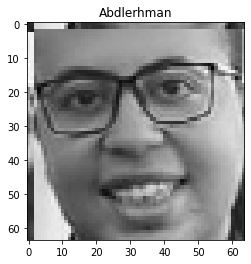

[226]


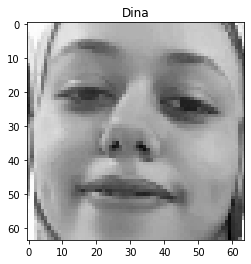

[180]


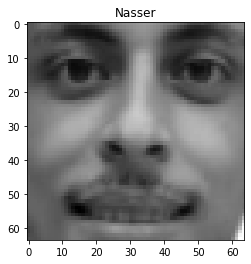

[106]


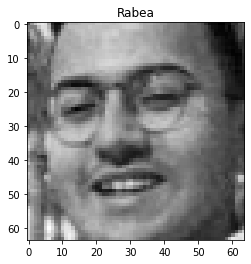

[87]


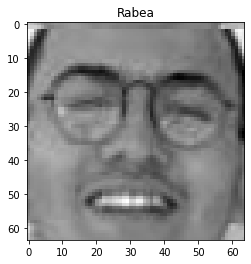

[116]


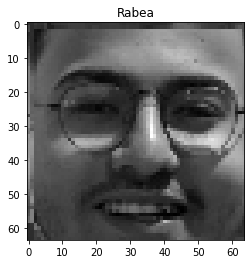

[9]


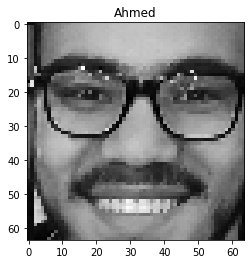

[142]


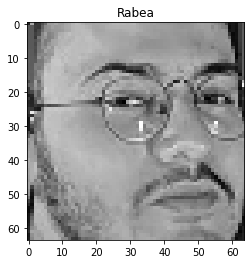

[85]


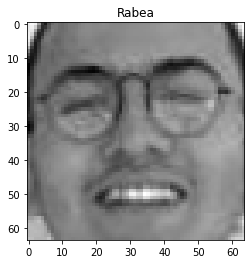

[27]


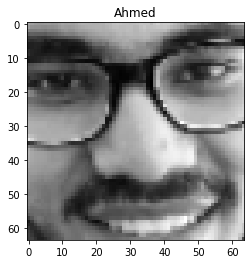

[308]


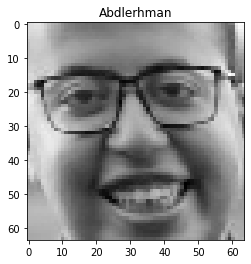

[118]


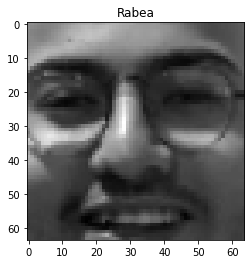

[15]


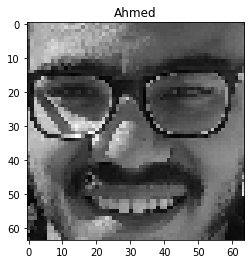

[307]


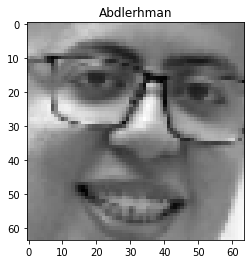

[98]


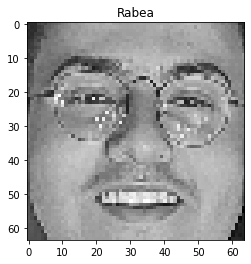

[247]


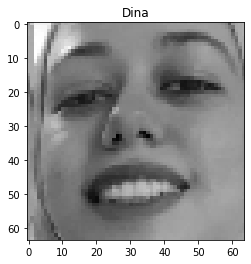

[331]


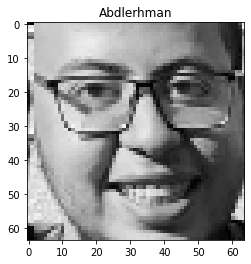

[192]


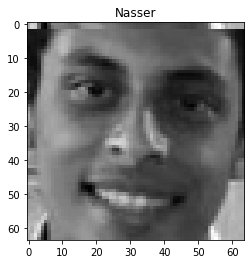

[252]


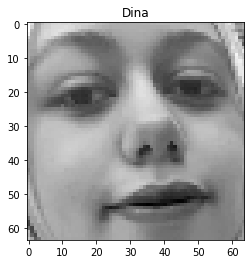

[320]


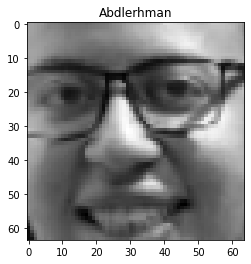

[3]


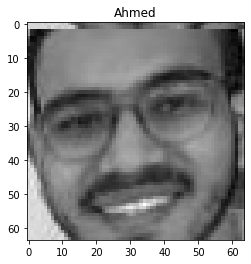

[112]


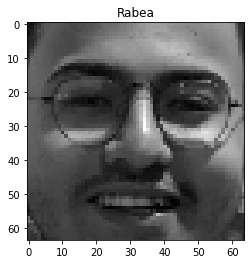

[47]


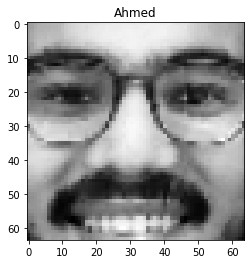

[125]


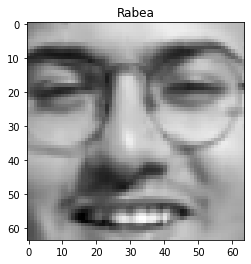

[241]


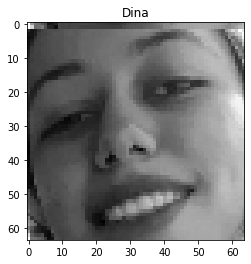

[102]


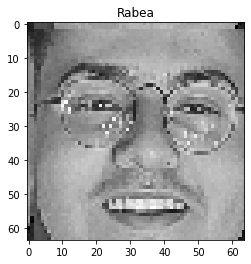

[341]


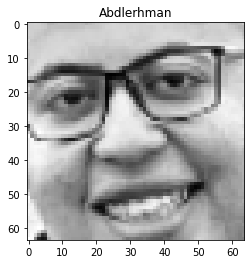

[175]


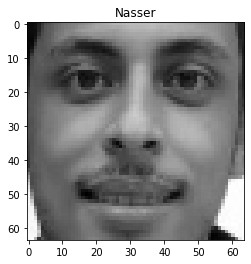

[256]


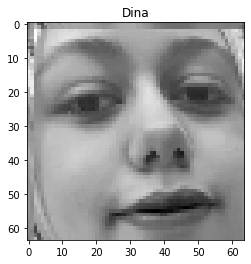

[270]


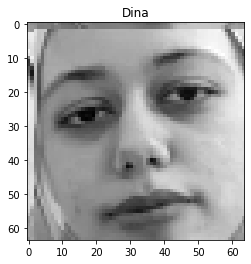

[106]


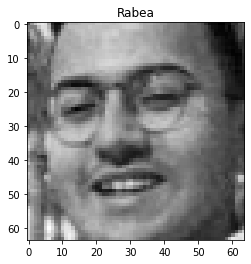

[69]


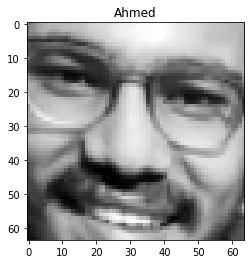

[240]


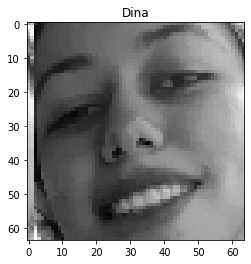

[254]


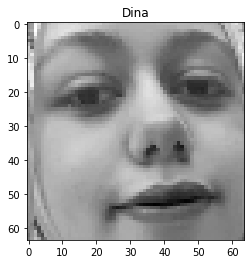

[235]


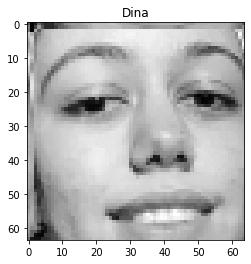

[241]


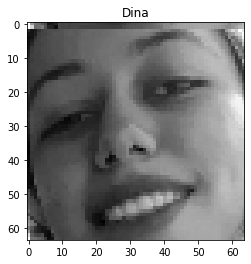

[81]


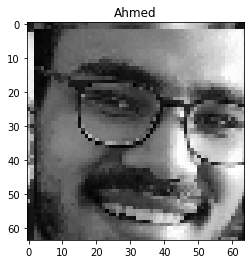

[180]


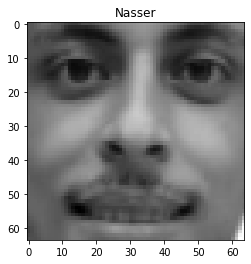

[257]


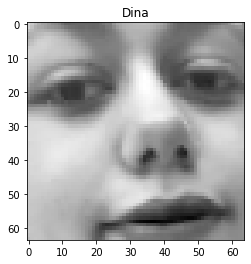

[37]


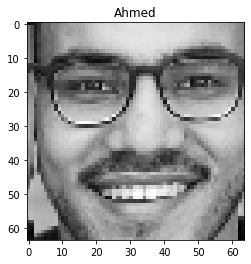

[22]


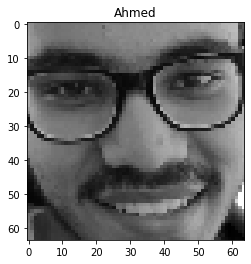

[60]


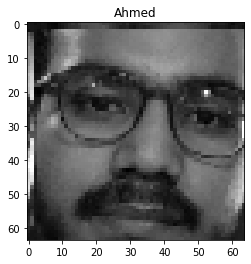

[132]


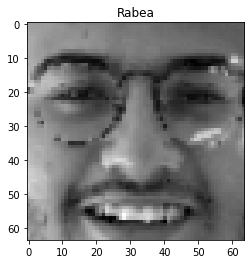

[29]


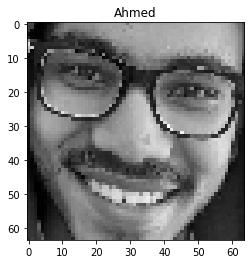

[101]


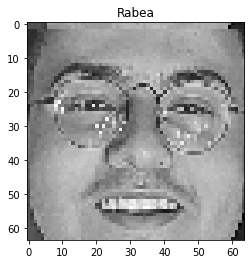

[238]


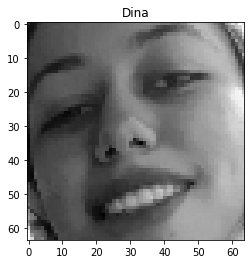

[143]


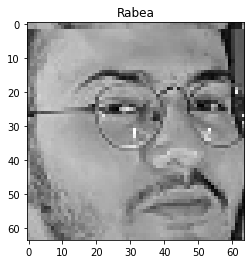

[96]


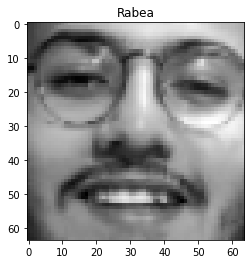

[167]


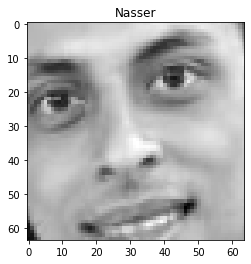

[319]


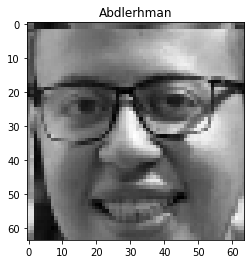

[135]


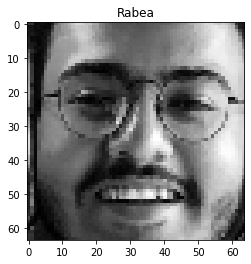

[238]


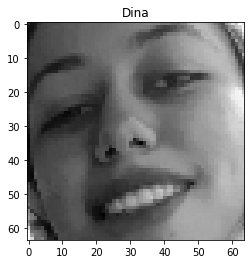

[318]


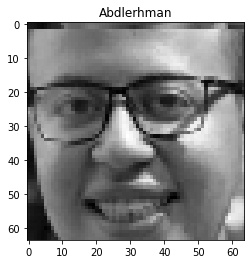

[361]


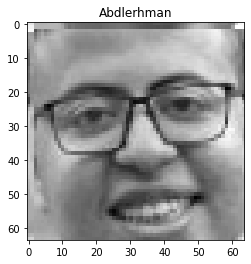

[191]


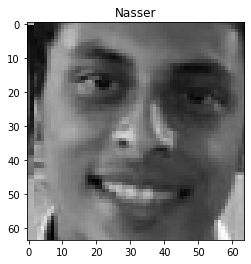

[7]


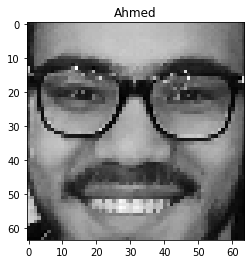

[160]


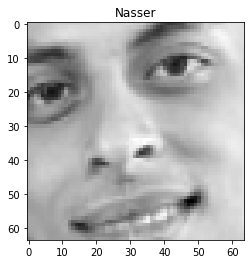

[54]


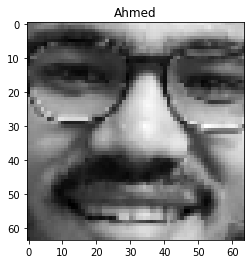

[154]


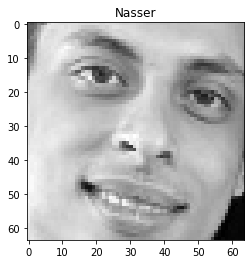

[191]


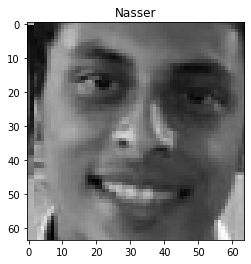

[285]


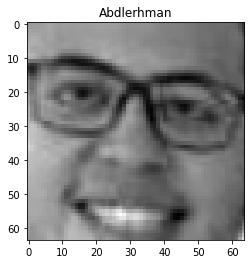

[91]


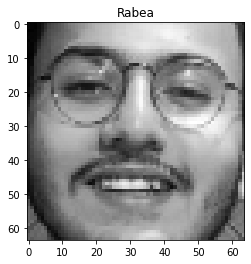

In [16]:
names = ['Ahmed','Rabea','Nasser','Dina','Abdlerhman']
for i in range(100):
    f = np.random.randint(low=0,high=363,size=(1))
    print(f)
    plt.title(names[y[f[0]]])
    plt.imshow(X[f[0],:],cmap="gray")
    plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
pca = NPCA()
Model = Classify()
Face = FaceDetection()

In [6]:
pca.apply_pca(X_train)
X_new = pca.preprocess_data(X_train)

In [7]:
pca.cut_values(0.9)
X_red = pca.reduce_dim(X_new)

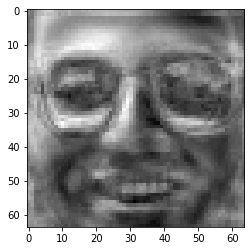

In [8]:
import matplotlib.pyplot as plt
X_recover = pca.reconstruct(X_red[10,:])
plt.imshow(X_recover.reshape(64,64),cmap="gray")

In [9]:
X_test_new = pca.preprocess_data(X_test)
X_test_new = pca.reduce_dim(X_test_new)

In [10]:
Model.fit(X_red,y_train,5)

In [11]:
acc = 0
for i in range(len(y_test)):
    y_hat = Model.predict(X_test_new[i,:])
    if y_hat == y_test[i]:
        acc += 1
print(acc/len(y_test))

0.958904109589041


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model_svm = SVC()
best_model = GridSearchCV(model_svm,{'kernel' : ('poly', 'rbf','linear'), 'C':[0.01, 0.1, 0.5, 1, 10,20,30,40]})
best_model.fit(X_red,y_train)
print(best_model.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [15]:
from sklearn.svm import SVC
SVmmodel = SVC(kernel="rbf",C=10)
SVmmodel.fit(X_red,y_train)

SVC(C=10)

In [16]:
SVmmodel.score(X_test_new,y_test)

0.8767123287671232

3


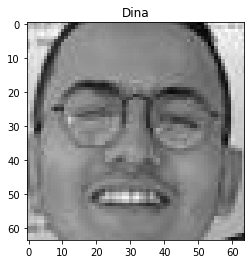

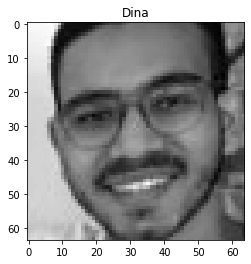

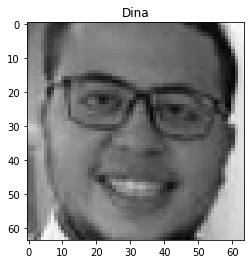

In [24]:
import cv2
names = ['Ahmed','Rabea','Nasser','Dina','Abdlerhman']
X_try = cv2.imread('../4.jpg',0)
n,dim  = Face.detect_faces('../4.jpg')
print(n)
imgs_n = []
pred = []
for i in range(n):
    new_img = X_try[dim[i][1]:dim[i][1]+dim[i][3],dim[i][0]:dim[i][0]+dim[i][2]]
    new_img = cv2.resize(new_img,(64,64))
    imgs_n.append(new_img)
imgs_n = np.array(imgs_n)
ll = pca.preprocess_data(imgs_n)
ll = pca.reduce_dim(ll)
for i in range(n):
    # y_hat = SVmmodel.predict(ll[i].reshape(1,-1))
    y_hat = Model.predict(ll[i,:])
    pred.append(names[y_hat]) 
    plt.title(pred[i])
    plt.imshow(imgs_n[i],cmap="gray")
    plt.show()

In [15]:
Model.save_weights()
pca.save_preprocessing()

mu:(4096,)
std dev:(4096,)
vecs :(4096, 99)
vals :(257,)
